In [5]:
# Importing the essentials libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Processing

In [6]:
# Loading and Reading the data
data = pd.read_csv('/content/Google Apps data.csv')

In [7]:
# Checking shape of data
data.shape

(8276, 15)

In [8]:
data.head()

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,1,1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         8276 non-null   int64  
 1   Unnamed: 0           8276 non-null   int64  
 2   App                  8276 non-null   object 
 3   Category             8276 non-null   object 
 4   Rating               8276 non-null   float64
 5   Reviews              8276 non-null   int64  
 6   Size                 8276 non-null   float64
 7   Installs             8276 non-null   int64  
 8   Type                 8276 non-null   object 
 9   Price                8276 non-null   float64
 10  Content Rating       7915 non-null   object 
 11  Last Updated         8276 non-null   object 
 12  Current Ver          8276 non-null   object 
 13  Minimum Android Ver  8276 non-null   object 
 14  Genres               8276 non-null   object 
dtypes: float64(3), int64(4), object(8)
mem

In [10]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Rating,Reviews,Size,Installs,Price
count,8276.000000,8276.000000,8276.000000,8.276000e+03,8276.000000,8.276000e+03,8276.000000
mean,4137.500000,4560.609957,4.175121,2.803270e+05,18.897761,9.658206e+06,1.028758
std,2389.219747,2560.879748,0.534762,2.096170e+06,22.376521,5.986505e+07,16.776622
min,0.000000,0.000000,1.000000,1.000000e+00,0.008300,1.000000e+00,0.000000
25%,2068.750000,2459.750000,4.000000,1.290000e+02,2.800000,1.000000e+04,0.000000
50%,4137.500000,4613.500000,4.300000,3.213500e+03,9.500000,1.000000e+05,0.000000
75%,6206.250000,6765.250000,4.500000,4.627800e+04,27.000000,1.000000e+06,0.000000
max,8275.000000,8916.000000,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


## Data Cleaning

In [11]:
# Dropping unnecessary Columns
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], inplace = True, axis=1)

In [12]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Last Updated', 'Current Ver',
       'Minimum Android Ver', 'Genres'],
      dtype='object')

In [13]:
# Checking Null values in data
data.isnull().sum()

App                      0
Category                 0
Rating                   0
Reviews                  0
Size                     0
Installs                 0
Type                     0
Price                    0
Content Rating         361
Last Updated             0
Current Ver              0
Minimum Android Ver      0
Genres                   0
dtype: int64

## Data Manipulation

In [14]:
# Checking columns for NaN value
data['Content Rating'].unique()

array(['Others', 'Teen', nan], dtype=object)

In [15]:
# Filling null value
data['Content Rating'].fillna('Others', inplace = True)

In [16]:
# Checking columns for NaN value
data['Content Rating'].unique()

array(['Others', 'Teen'], dtype=object)

In [17]:
data.shape

(8276, 13)

In [18]:
data.isnull().sum()

App                    0
Category               0
Rating                 0
Reviews                0
Size                   0
Installs               0
Type                   0
Price                  0
Content Rating         0
Last Updated           0
Current Ver            0
Minimum Android Ver    0
Genres                 0
dtype: int64

# Data Visualization

## Most Downloaded Apps

In [19]:
# Calculating the number of downloads for each app
downloads = data.groupby('App')['Installs'].max()
downloads

App
+Download 4 Instagram Twitter                       1000000
- Free Comics - Comic Apps                            10000
.R                                                    10000
/u/app                                                10000
058.ba                                                  100
                                                     ...   
감성학원 BL 첫사랑                                           10000
💎 I'm rich                                            10000
💘 WhatsLov: Smileys of love, stickers and GIF       1000000
📏 Smart Ruler ↔️ cm/inch measuring for homework!      10000
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    1000000
Name: Installs, Length: 8190, dtype: int64

In [20]:
#Getting Top 10 Most Downloaded Apps
top_downloads = downloads.sort_values(ascending = False)[:10]
print(top_downloads)

App
Google Street View              1000000000
WhatsApp Messenger              1000000000
Google Play Books               1000000000
Google Play Games               1000000000
Google Play Movies & TV         1000000000
Google+                         1000000000
Google Drive                    1000000000
Google Chrome: Fast & Secure    1000000000
Google Photos                   1000000000
Maps - Navigate & Explore       1000000000
Name: Installs, dtype: int64


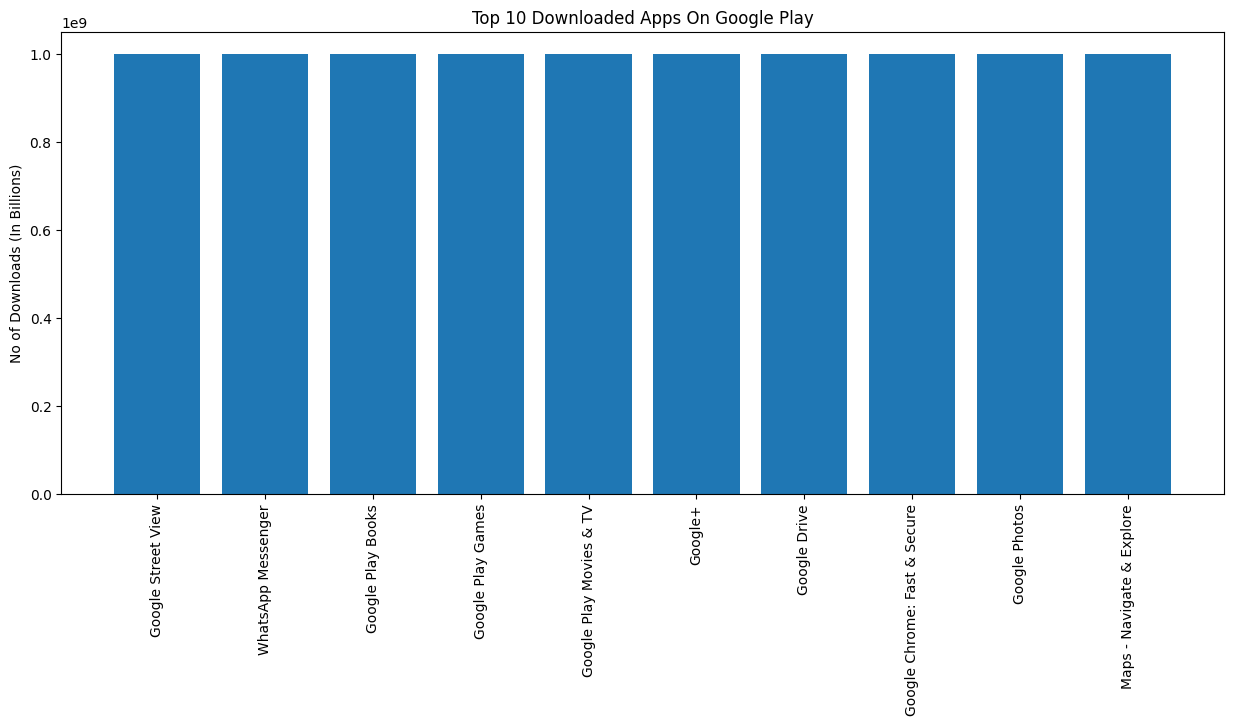

In [68]:
# Creating bar chart for top 10 App downloads
plt.figure(figsize=(15,6))
top_downloads = downloads.sort_values(ascending = False)[:10]

plt.bar(top_downloads.index, top_downloads.values)

plt.title('Top 10 Downloaded Apps On Google Play')
plt.ylabel('No of Downloads (In Billions)')
plt.xticks(rotation = 90)
plt.show()


## Category Wise downloads

In [22]:
# Calculating downloads for each category
cat_downloads = data.groupby('Category')['Installs'].sum()
cat_download_sort = cat_downloads.sort_values(ascending = False)


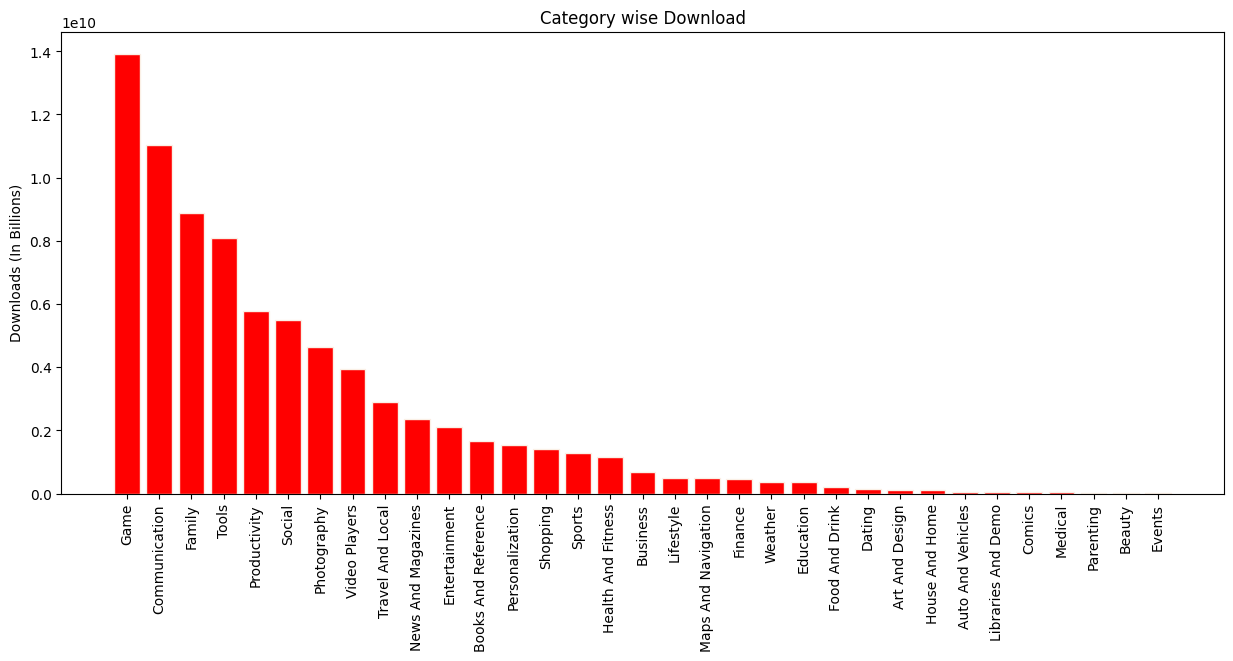

In [67]:
# creating barplot od downloads vs category
plt.figure(figsize=(15,6))
plt.bar(cat_download_sort.index, cat_download_sort.values, color = 'red', edgecolor = 'linen')

plt.title('Category wise Download')
plt.ylabel('Downloads (In Billions)')
plt.xticks(rotation = 90)

plt.show()

## Average rating for each category

In [24]:
# Calculating average rating for each category
category_rating = data.groupby('Category')['Rating'].mean()

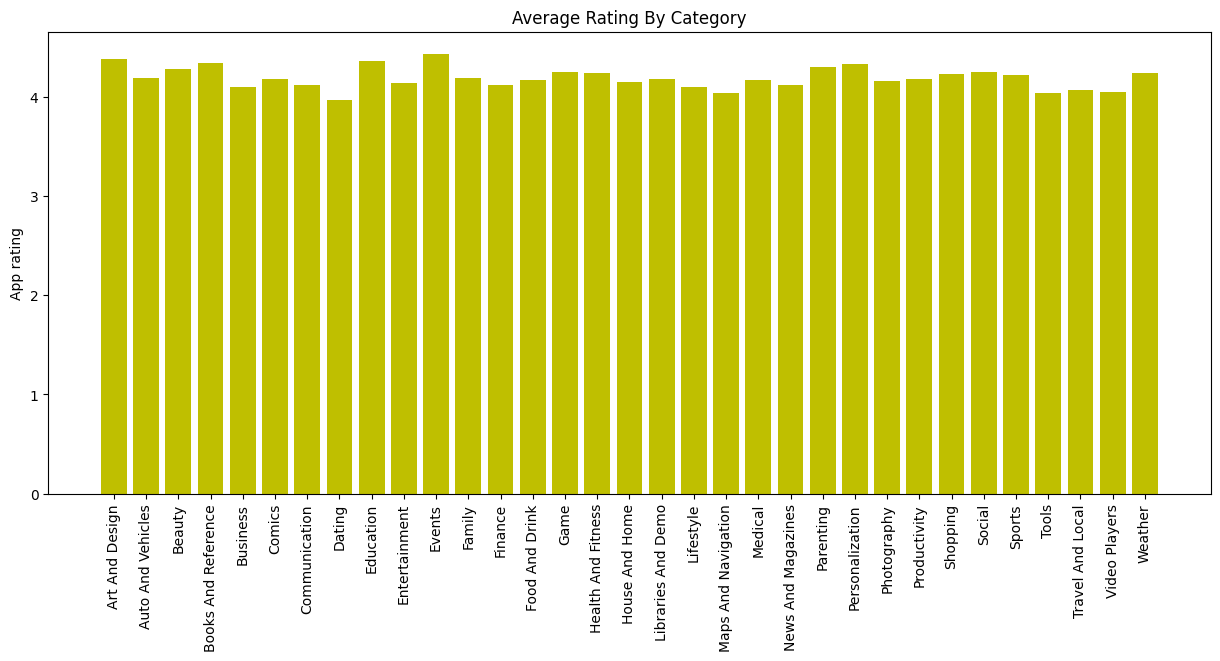

In [71]:
# Creating barplot for each category
plt.figure(figsize=(15,6))
plt.bar(category_rating.index, category_rating.values, color = 'y')

plt.title('Average Rating By Category')
plt.ylabel('App rating')
plt.xticks(rotation = 90)
plt.show()

## Most Rated Apps

In [54]:
# Calculating the sum of all ratings
top_rated = data.groupby('App')['Rating'].max()


In [59]:
top_rated_app = top_rated.sort_values(ascending = False)[:10]
print('The Top 10 Most Rated Apps Are:')
print(top_rated_app)

The Top 10 Most Rated Apps Are:
App
BP Log lite                      5.0
CR Tracker for Chests            5.0
CP Trivia                        5.0
Mindvalley U Tallinn 2018        5.0
CP Installer App                 5.0
COMSATS BOOK STORE FOR BS(CS)    5.0
Monster Ride Pro                 5.0
CN Resident                      5.0
Morse Player                     5.0
Movement BE                      5.0
Name: Rating, dtype: float64


## Category vs Price

In [140]:
category_price = data.groupby('Category')['Price'].sum()

category_price_sorted = category_price.sort_values(ascending = False)
category_price_sorted

Category
Finance                2439.87
Family                 2270.81
Lifestyle              1960.88
Medical                 623.87
Game                    277.37
Tools                   207.90
Personalization         122.79
Sports                   93.21
Photography              72.31
Productivity             70.92
Business                 64.41
Communication            56.69
Health And Fitness       42.39
Travel And Local         37.49
Weather                  29.43
Maps And Navigation      26.95
Books And Reference      23.88
Dating                   18.97
Education                17.96
Video Players            10.46
Parenting                 9.58
Food And Drink            8.48
Entertainment             7.98
Art And Design            5.97
Shopping                  5.48
News And Magazines        3.98
Auto And Vehicles         1.99
Social                    1.98
Libraries And Demo        0.00
Events                    0.00
Comics                    0.00
Beauty                    0.00

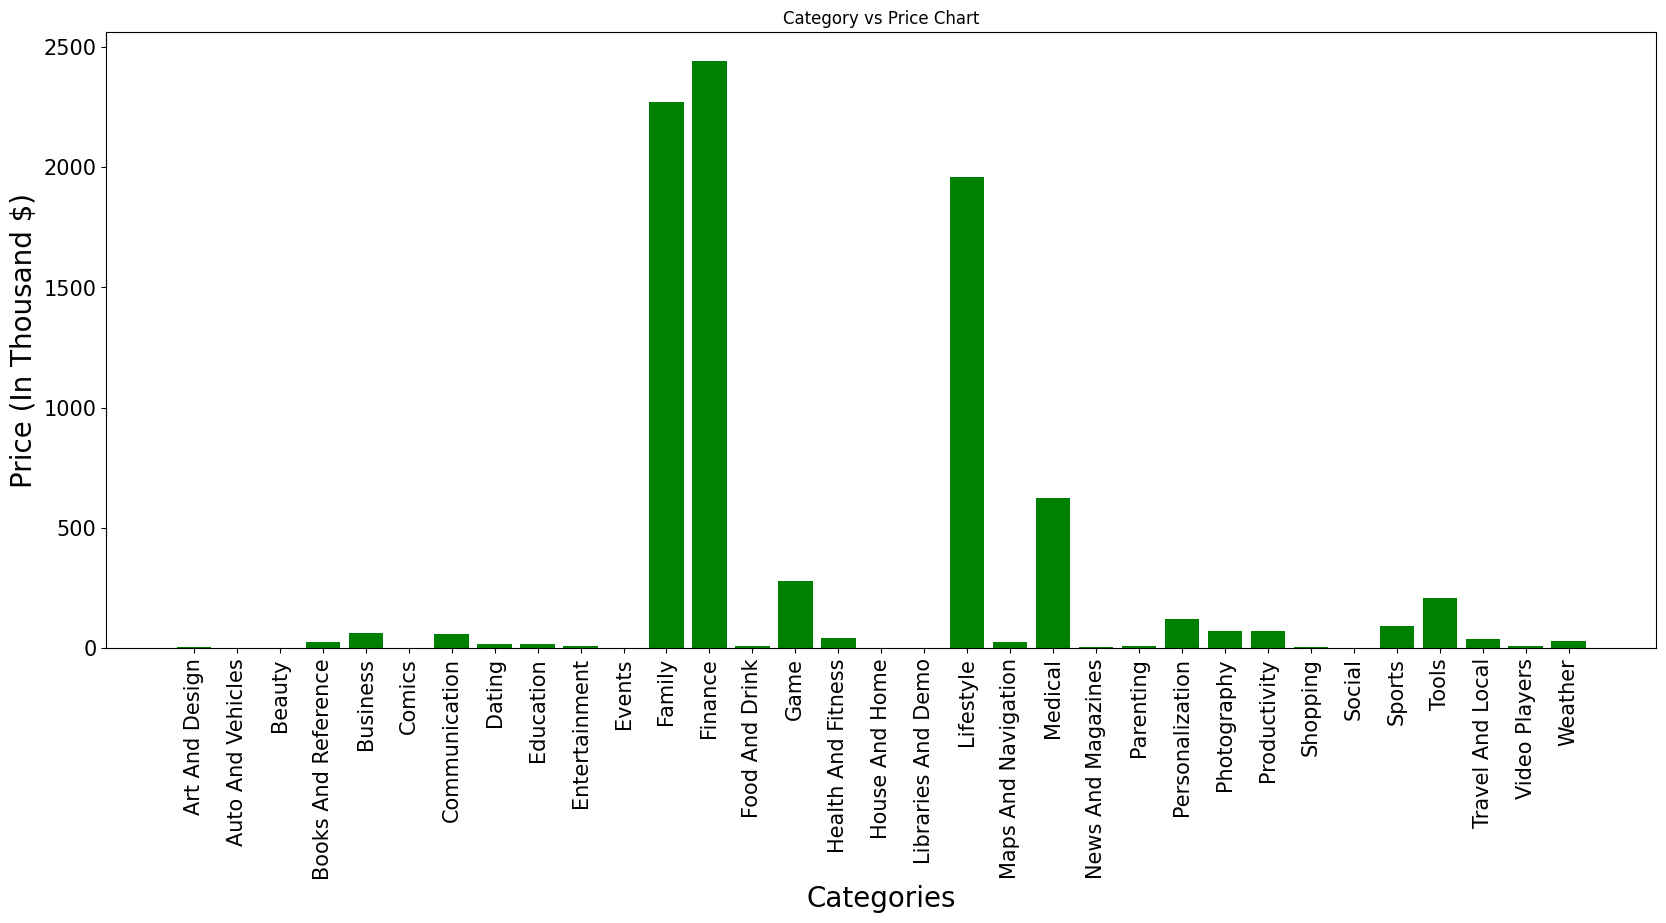

In [133]:
# Creating Chart for visualization

plt.figure(figsize= (20,8))

plt.bar(category_price.index, category_price.values, color = 'g')
plt.title('Category vs Price Chart')
plt.xlabel('Categories', fontsize=20)
plt.ylabel('Price (In Thousand $)', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize = 15)

plt.show()


## Free Apps vs Paid Apps

In [110]:
# Calculating percetage

count = data['Type'].value_counts()

free_apps_percentage = (count['Free']/data.shape[0])*100
paid_apps_percentage = (count['Paid']/data.shape[0])*100

print('The Free Apps Percentage: {:.2f}%'.format(free_apps_percentage))
print('The Paid Apps Percentage: {:.2f}%'.format(paid_apps_percentage))

The Free Apps Percentage: 92.70%
The Paid Apps Percentage: 7.30%


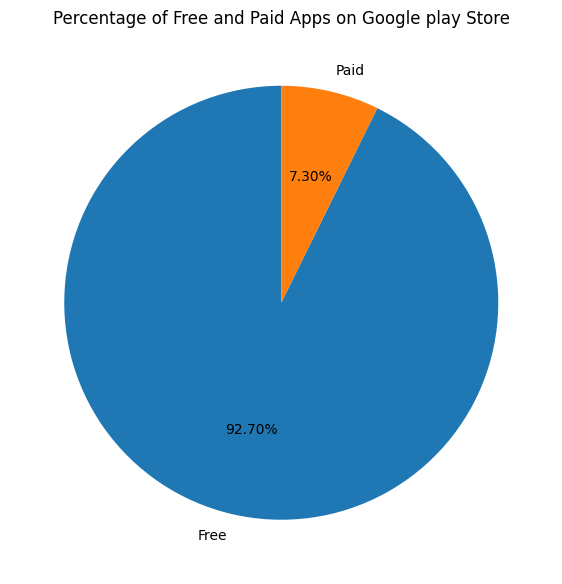

In [111]:
# Creating Pie plot 
plt.figure(figsize = (7,10))

plt.pie(count, labels=['Free', 'Paid'], autopct='%0.2f%%', startangle=90)

plt.title('Percentage of Free and Paid Apps on Google play Store')
plt.show()

## Most Reviewed Apps

In [116]:
# Getting Most Reviewed Apps list

Most_reviewed = data.groupby('App')['Reviews'].max()
Most_reviewed_sorted = Most_reviewed.sort_values(ascending = False)[:10]
Most_reviewed_sorted

App
Facebook                                              78158306
WhatsApp Messenger                                    69119316
Instagram                                             66577313
Messenger – Text and Video Chat for Free              56642847
Clash of Clans                                        44891723
Clean Master- Space Cleaner & Antivirus               42916526
Subway Surfers                                        27722264
YouTube                                               25655305
Security Master - Antivirus, VPN, AppLock, Booster    24900999
Clash Royale                                          23133508
Name: Reviews, dtype: int64

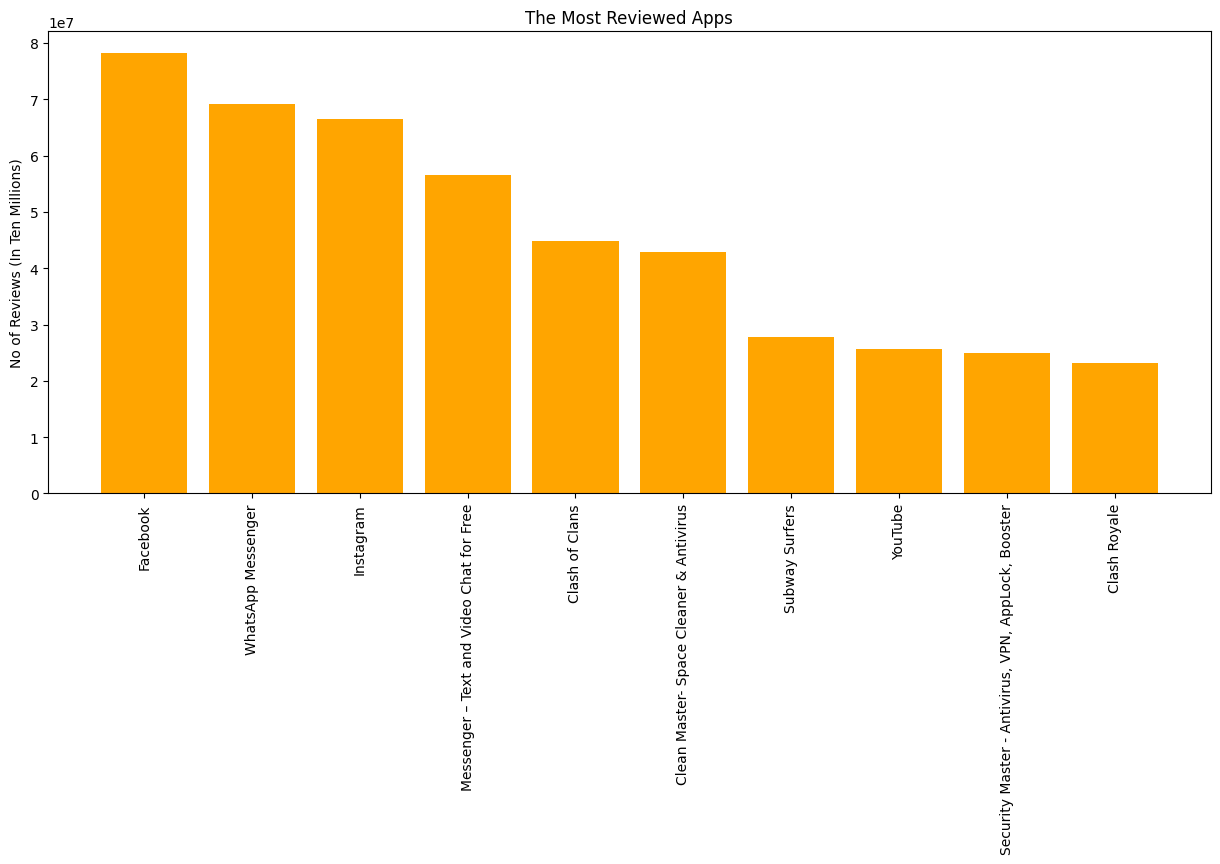

In [128]:
# Creating barplot for most reviewed apps
plt.figure(figsize = (15,6))

plt.bar(Most_reviewed_sorted.index, Most_reviewed_sorted.values, color = 'orange')

plt.title('The Most Reviewed Apps')
plt.ylabel('No of Reviews (In Ten Millions)')
plt.xticks(rotation= 90)
plt.show()

**Conclusion**:

Based on the analysis of the Android apps dataset, we can draw several conclusions:

1. The most common category of apps is 'Games', followed by 'Communication', 'Family', and 'Tools'.

2. The most expensive apps are in the 'Family' and 'Finance' categories, while the least expensive apps are in the 'Social' and 'News and Magazine' categories.
3. The majority of apps are free, while the remaining apps have prices ranging from 0.99 to 400 USD.
4. The top 5 most reviewed apps are 'Facebook', 'WhatsApp', 'Instagram', 'Clash of Clans' and 'Clean Master'.
5. The most reviewed app is 'Facebook', with over 78 million reviews.
6. The top 5 most rated apps are 'BP Log lite',  'CR Tracker for Chests', 'CP Trivia', 'Mindvalley U Tallinn'and 'CP Installer App'.
7. The highest-rated apps are in the 'Health & Fitness', 'Education', and 'Books & Reference' categories, while the lowest-rated apps are in the 'Dating', 'Communication', and 'Social' categories.

Overall, this dataset provides valuable insights into the Android app market, and can help developers and businesses make informed decisions about app development and marketing.





